In [1]:
## Bibliotecas necessárias 

# Biblioteca para Modelagem
import numpy as np
import pandas as pd

# Biblioteca para análise gráfica
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

# Ignorar avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Lendo a base de dados e visulizando as primeiras linhas
BaseDados = pd.read_csv("MRFG3.SA.csv")
BaseDados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,14.66,14.79,14.16,14.30,11.246990,8144400
1,2021-01-05,14.29,14.33,13.98,14.21,11.176205,7203500
2,2021-01-06,14.20,14.26,13.75,13.78,10.838008,11868700
3,2021-01-07,13.86,14.09,13.79,13.84,10.885200,6188000
4,2021-01-08,13.90,14.16,13.88,14.01,11.018906,7752900


In [3]:
# Verificando se é necessário alguma modificação no tipo de dado
BaseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       342 non-null    object 
 1   Open       342 non-null    float64
 2   High       342 non-null    float64
 3   Low        342 non-null    float64
 4   Close      342 non-null    float64
 5   Adj Close  342 non-null    float64
 6   Volume     342 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 18.8+ KB


In [4]:
# Mudando o Type da coluna "Date" para data e verificando a mudança
BaseDados["Date"] = BaseDados["Date"].astype("datetime64")
BaseDados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       342 non-null    datetime64[ns]
 1   Open       342 non-null    float64       
 2   High       342 non-null    float64       
 3   Low        342 non-null    float64       
 4   Close      342 non-null    float64       
 5   Adj Close  342 non-null    float64       
 6   Volume     342 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 18.8 KB


Text(0, 0.5, 'Valor da Ação (R$)')

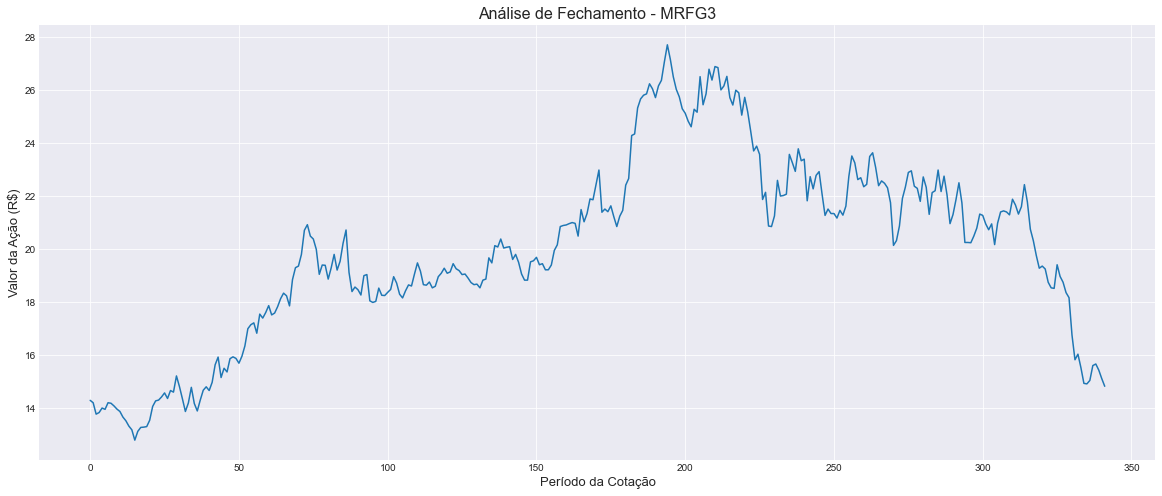

In [5]:
# Estilo do gráfico
plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(20, 8))

# Criando o gráfico
plt.title('Análise de Fechamento - MRFG3', fontsize=16)
plt.plot(BaseDados.Close, label="Fechamento")

# Titulos
plt.xlabel('Período da Cotação',fontsize=13)
plt.ylabel('Valor da Ação (R$)',fontsize=13)

Text(0, 0.5, 'Valor da Ação (R$)')

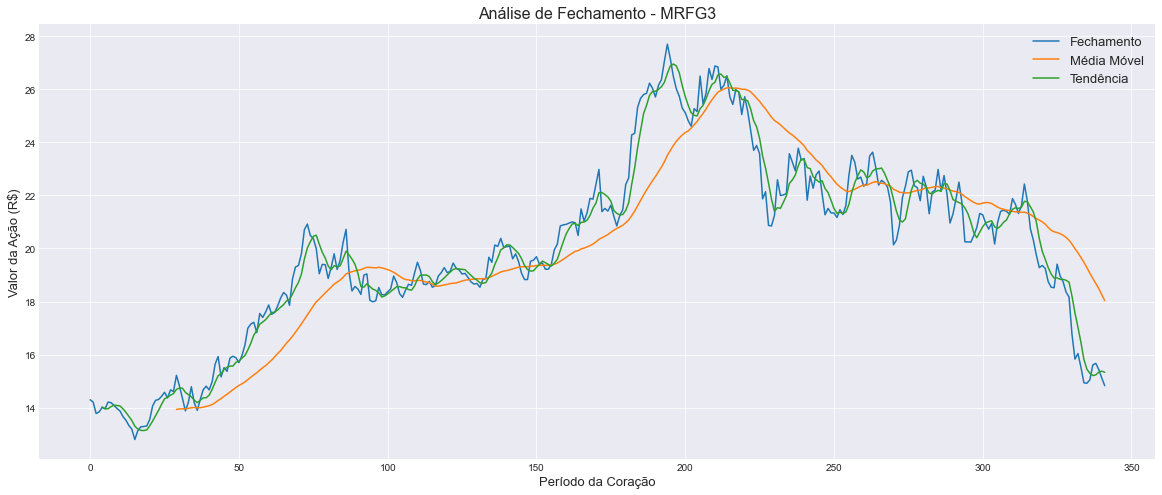

In [6]:
## Grafico de Tendência e Média móvel

# Criando as variáveis
MediaMovel = BaseDados['Close'].rolling(5).mean()
Tendencia = BaseDados['Close'].rolling(30).mean()

# Estilo do gráfico
plt.style.use('seaborn-darkgrid')
plt.figure( figsize=(20, 8) )
plt.title('Análise de Fechamento - MRFG3', fontsize=16)

# Criando o gráfico
plt.plot( BaseDados.Close, label="Fechamento")
plt.plot( Tendencia, label="Média Móvel")
plt.plot( MediaMovel, label='Tendência')

# Titulos e legendas
plt.legend(fontsize=13, loc=1)
plt.xlabel('Período da Coração',fontsize=13)
plt.ylabel('Valor da Ação (R$)',fontsize=13)

Text(0, 0.5, 'Valor da Ação (R$)')

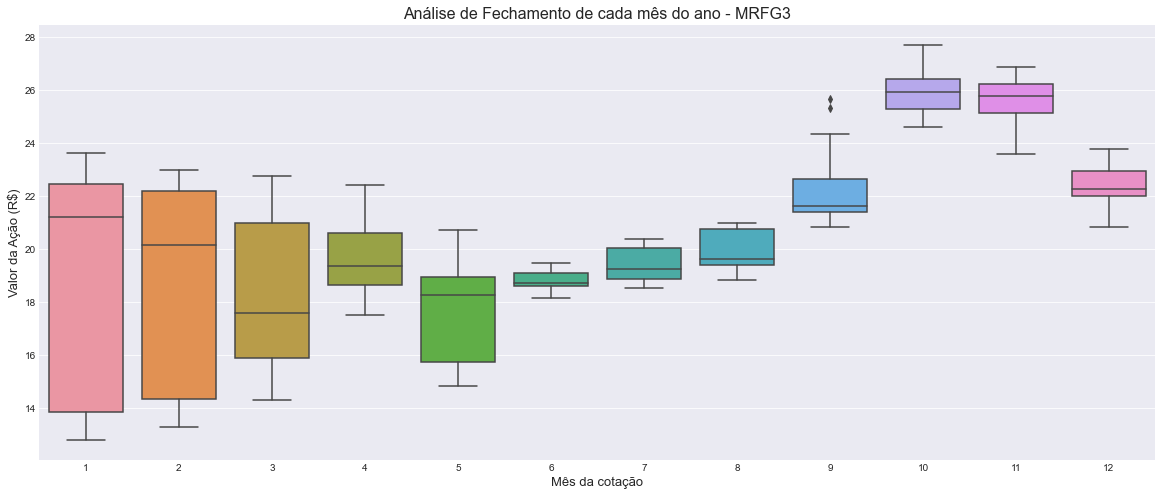

In [7]:
# Criando colunda de Mês
BaseDados["month"] = BaseDados["Date"].dt.month
# Gerando BoxPlot
plt.figure(figsize= (20,8))
sns.boxplot(data=BaseDados, x = "month", y = "Close")
plt.title('Análise de Fechamento de cada mês do ano - MRFG3', fontsize=16)
plt.xlabel('Mês da cotação',fontsize=13)
plt.ylabel('Valor da Ação (R$)',fontsize=13)

In [8]:
# Criando gráfico com a Abertura, Fechamento, Maior e Menor valor do dia

Grafico = go.Figure(
    data=[
          go.Candlestick(
              x= BaseDados.Date,
              open = BaseDados['Open'],
              high = BaseDados['High'],
              low = BaseDados['Low'],
              close = BaseDados['Close'],
          )
    ]
)
Grafico.layout.template = "seaborn"
Grafico.layout.height = 600
Grafico.layout.width = 1180
Grafico.show()